In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kenneithUC/week-6-datamining/refs/heads/main/adult.csv/adult.csv')
df.head()

# Viewing 5 rows of the data.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df['workclass'] = df['workclass'].replace('?', pd.NA)
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

df['occupation'] = df['occupation'].replace('?', pd.NA)
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
#Since in workclass and occupation contains ? we need to change it to Na then replace the Na with the most number of count.

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


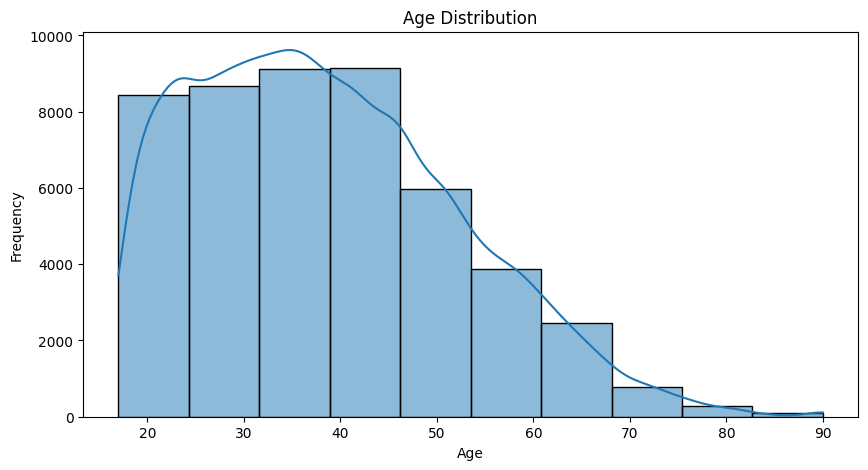

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
#The graph shows the age distribution of a population. It depicts how the frequency or number of individuals changes with age. The graph has a bell-shaped curve, indicating that the population has more individuals in the middle age range and fewer at the younger and older ages.

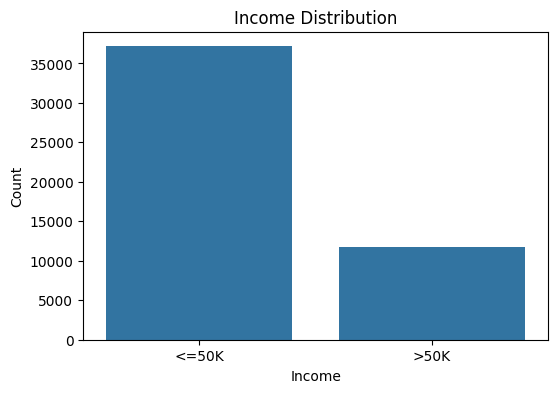

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()
#The graph shows the income distribution of a population. It indicates that there are more individuals with an income less than or equal to $50k compared to those with an income greater than $50k.

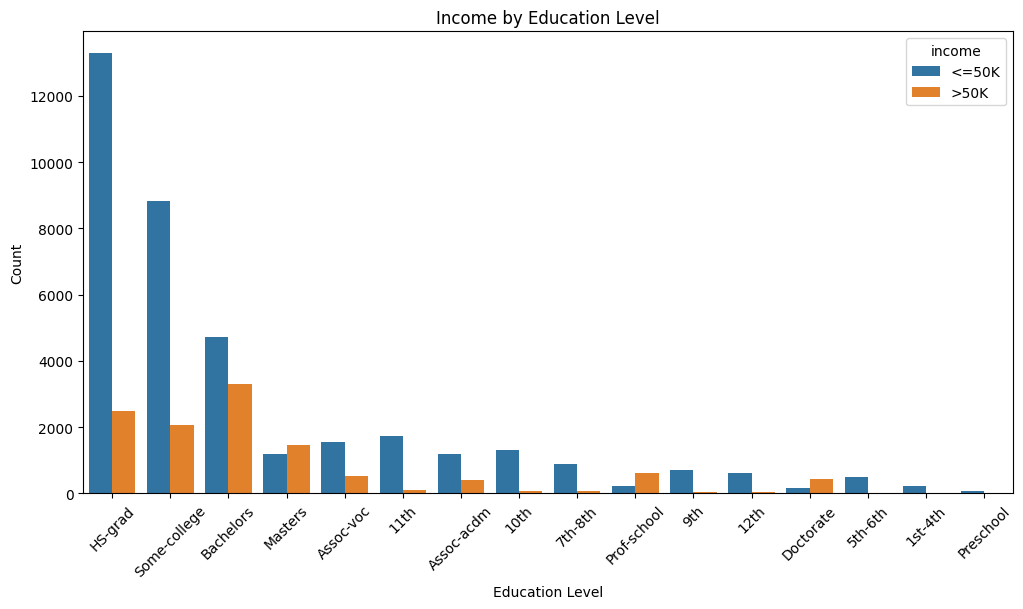

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title("Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#The graph shows the relationship between income and education level. It indicates that higher levels of education are generally associated with higher incomes, with the highest incomes seen for those with doctoral or professional degrees.

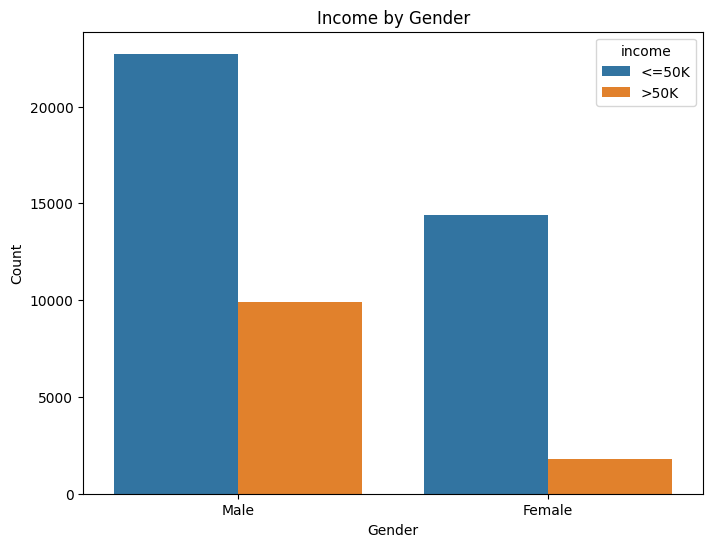

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=df)
plt.title("Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
#The graph shows the income distribution by gender. It indicates that males on average have higher incomes compared to females, with a greater proportion of males earning over $50k and a greater proportion of females earning under $50k.

In [ ]:
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])
df.sample(5)

#change the string to float

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
44745,37,1,272471,11,9,0,0,4,4,0,0,0,40,39,0
33823,37,3,188503,9,13,4,0,1,4,0,0,0,35,39,0
21886,55,1,123382,8,11,5,9,4,2,0,0,0,35,39,0
3700,21,3,112906,8,11,4,7,3,4,0,0,0,44,39,0
43162,18,3,199039,2,8,4,11,3,4,1,594,0,14,39,0


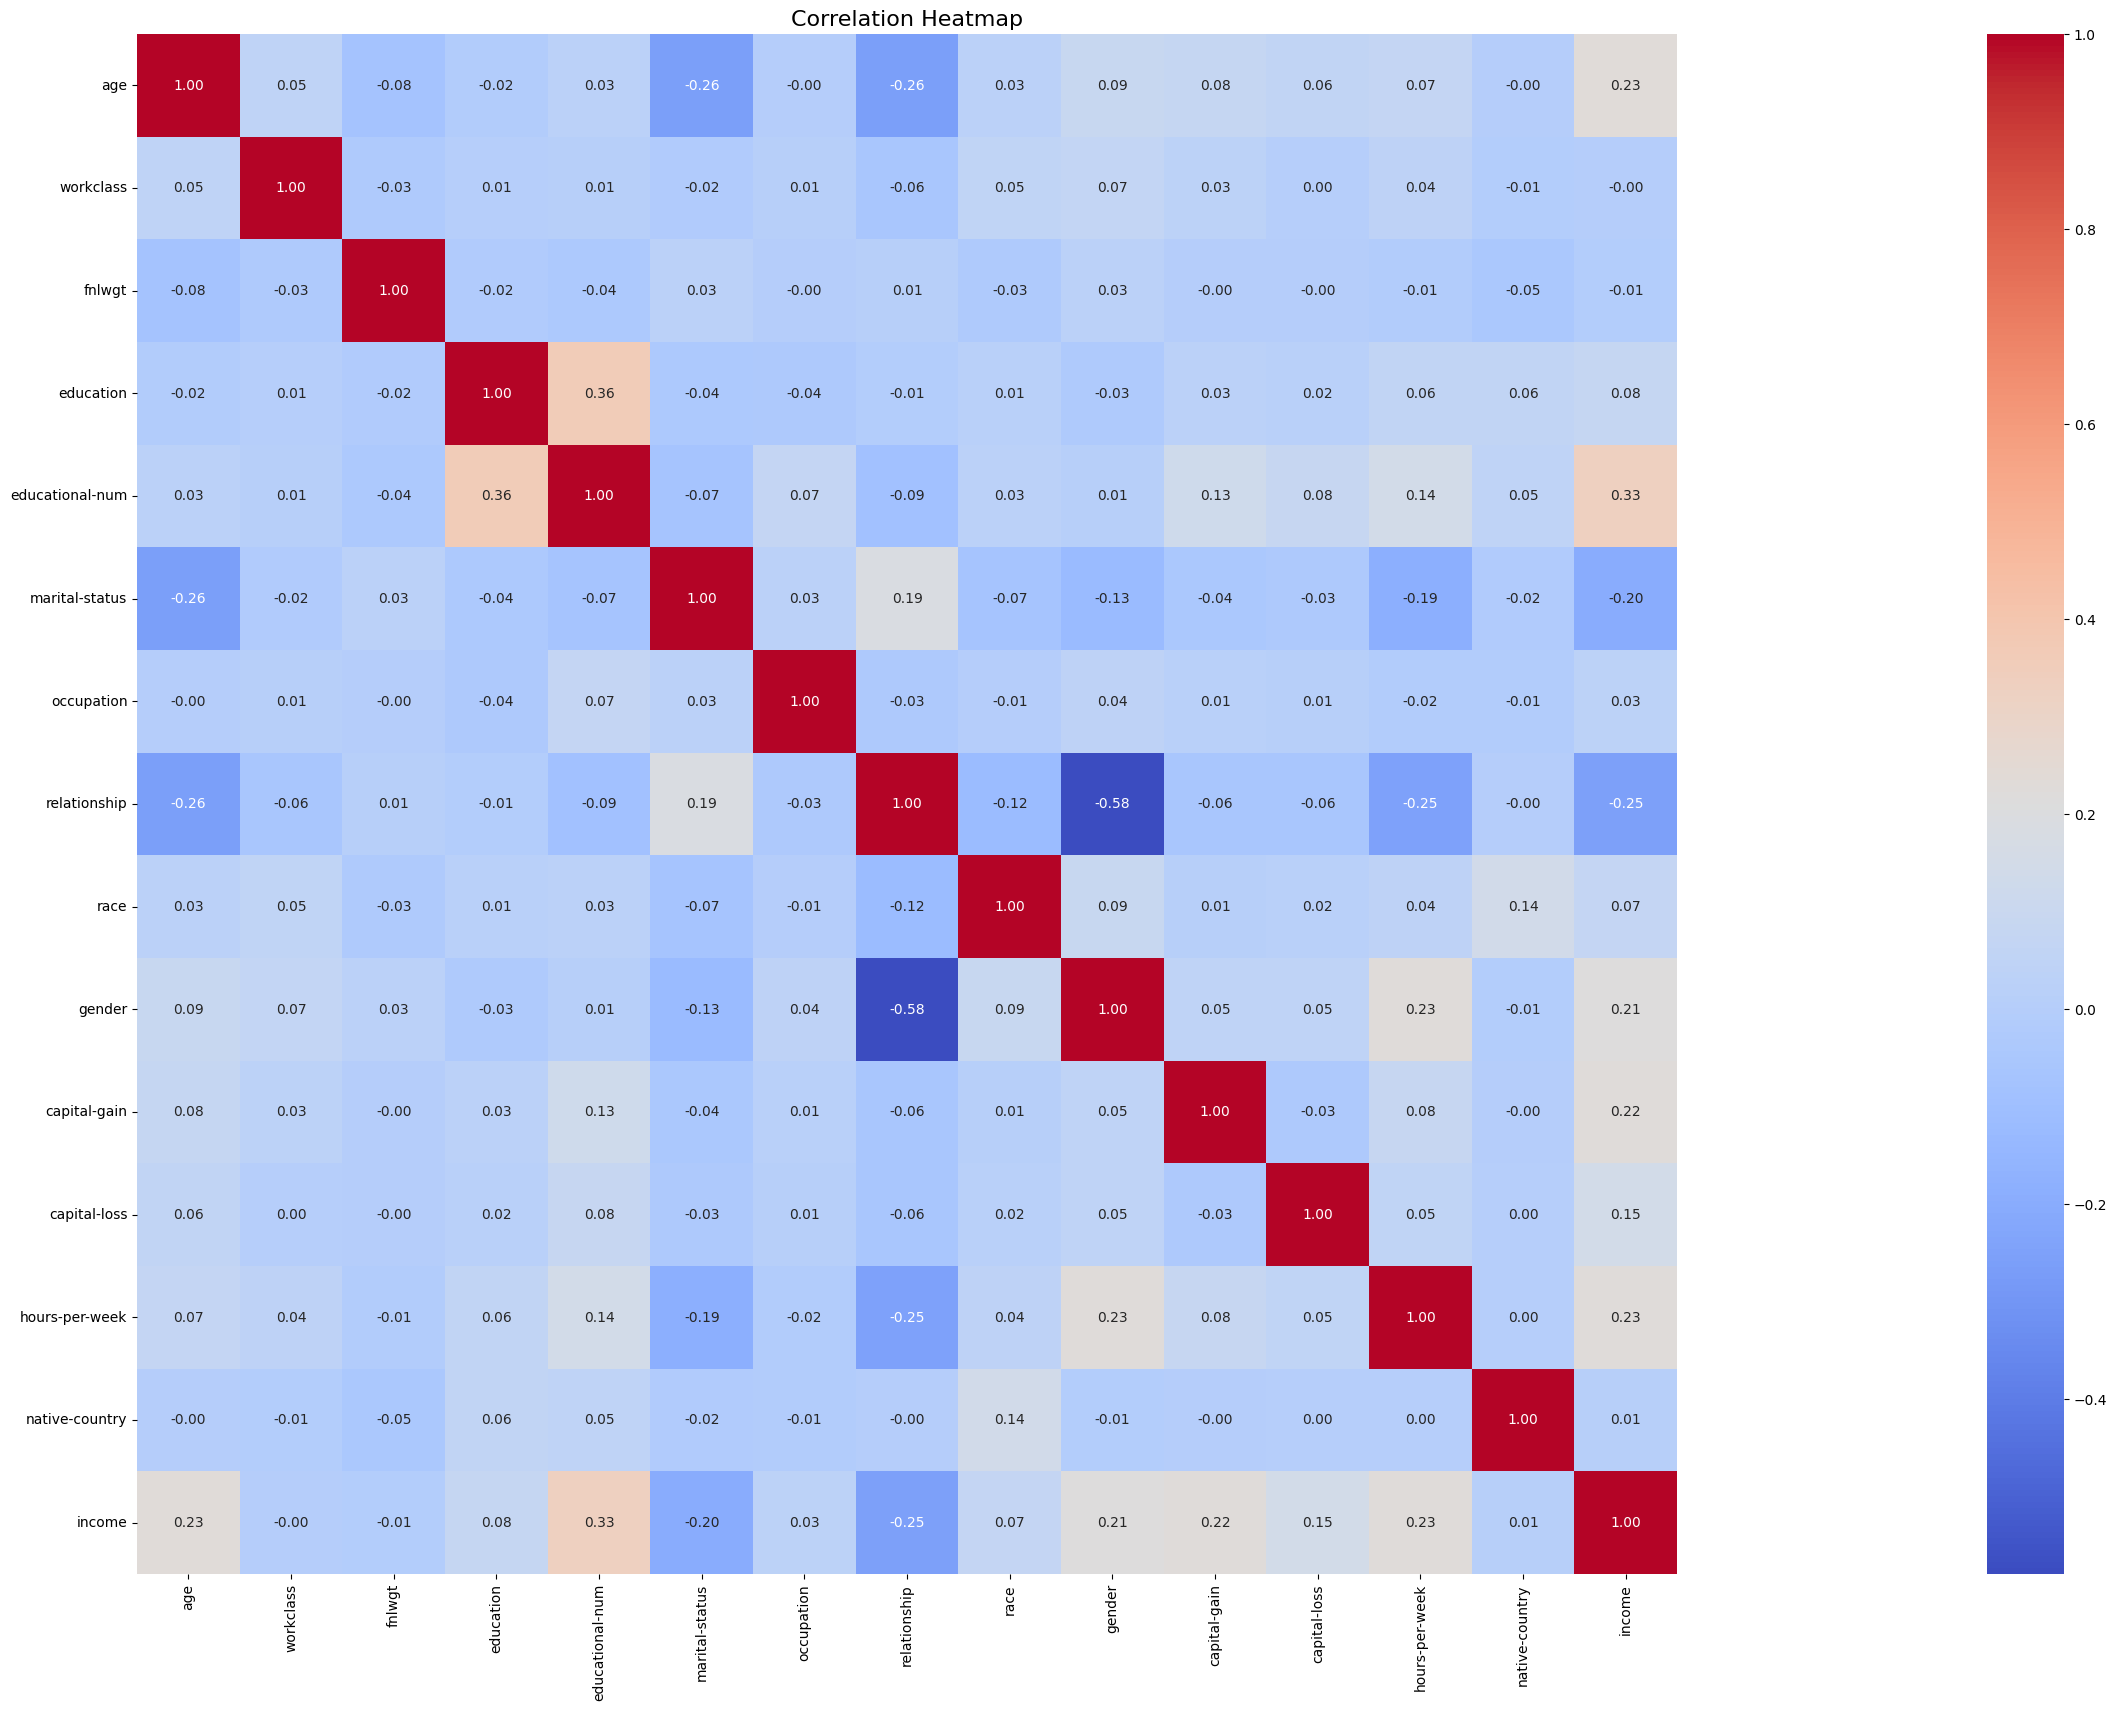

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(80, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
#The graph shows the relationship between income and education level. It indicates that higher levels of education are generally associated with higher incomes, with the highest incomes seen for those with doctoral or professional degrees.

In [ ]:
X = df.drop('income',axis=1)
y = df['income']
# X is the predicting variable, and y is the predicted variable

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Membagi data 20 persen untuk test, 80 persen untuk train, bisa dilihat dalam shape, train memiliki 39073 baris dan test memiliki 9769 baris

Shape of X_train: (39073, 14)
Shape of X_test: (9769, 14)


In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)
# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a 85% percent accuracy.

Model accuracy score with criterion entropy: 0.8449


In [ ]:
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.8449
Training accuracy: 0.8384


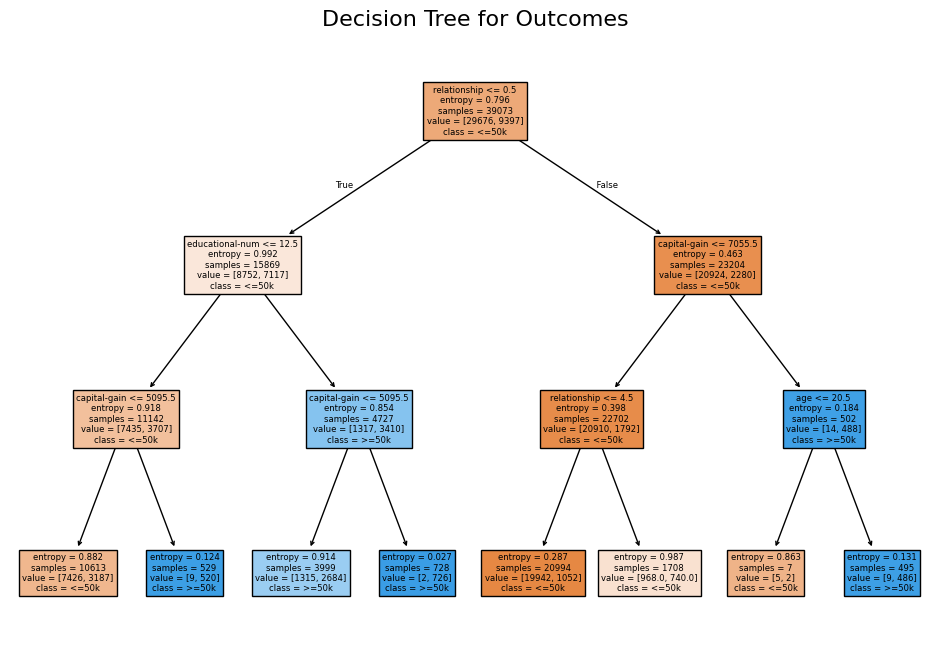

In [ ]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=['<=50k','>=50k'], filled=True)
plt.title('Decision Tree for Outcomes', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.

In [ ]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a 84 percent accuracy

Model accuracy score with criterion gini: 0.8449


In [ ]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.8449
Training accuracy: 0.8384


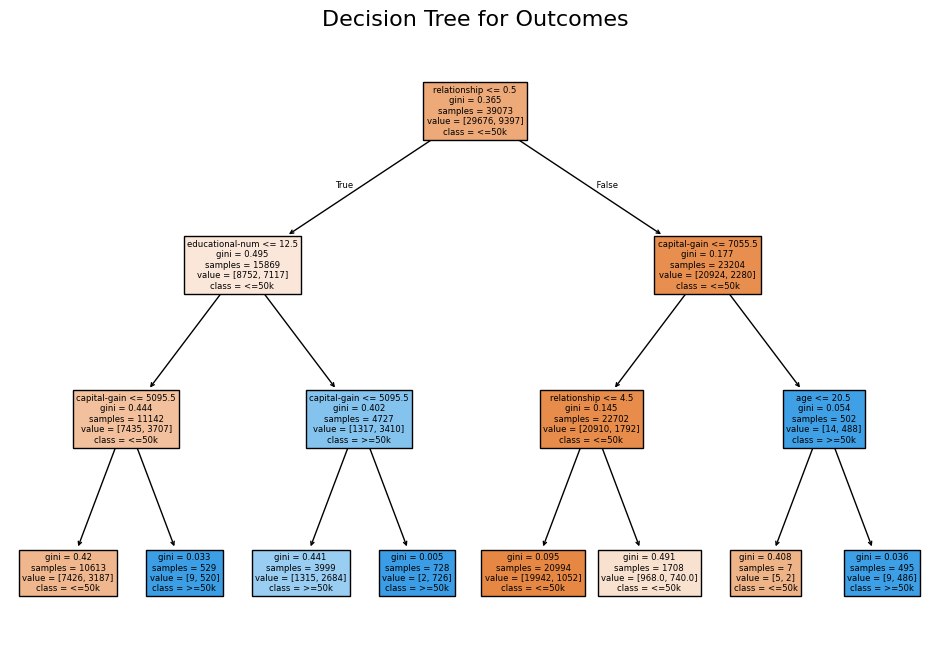

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['<=50k','>=50k'], filled=True)
plt.title('Decision Tree for Outcomes', fontsize=16)
plt.show()


# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

In [ ]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[7136  343]
 [1172 1118]]
Confusion Matrix Gini Index:
 [[7136  343]
 [1172 1118]]


In [ ]:
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)

# Printing the classification report both Criterion Entropy and Criterion Gini.

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

# Printing both accuracy score and confusion matrix of the Naive Bayes Classifier model, showing a 80% accuracy.

Model accuracy score: 0.7991
Confusion Matrix:
 [[7096  383]
 [1580  710]]


In [ ]:
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

# Classification report of the Naive Bayes Classifier, showing the precision, recall, f1-score, and support values of the model.

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

